# Data_cleaning + ML
This notebook will collect all the iterations of our ML process which aim to predict the ETH close market price 
with a lag of 25 days.
- First, some basic model will be applied. For the first part aonly the data available from binance api will be used.
- In the second part, we will introduce the historical sentiment data aiming for improvement in the model prediction.
- Eventually, google trends data will be imported and included in teh model aiming for better results.

## Libraries import

In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh')

## 1. Import data csv
importing Ethereum historical data obtained from the binance API. This dataset will be cleaned and used to develop a 
first price prediction attempt.


In [2]:
df = pd.read_csv('binance_hist_data.csv', index_col= 0)
df

,datetime,open,high,low,close,volume
2017-08-17 02:00:00,1502928000000,301.13,312.18,298.00,302.00,7.030710e+03
2017-08-18 02:00:00,1503014400000,302.00,311.79,283.94,293.96,9.537846e+03
2017-08-19 02:00:00,1503100800000,293.31,299.90,278.00,290.91,2.146198e+03
2017-08-20 02:00:00,1503187200000,289.41,300.53,282.85,299.10,2.510139e+03
2017-08-21 02:00:00,1503273600000,299.10,346.52,294.60,323.29,5.219445e+03
...,...,...,...,...,...,...
2021-05-07 02:00:00,1620345600000,3489.74,3587.00,3353.23,3479.53,7.605446e+05
2021-05-08 02:00:00,1620432000000,3479.79,3958.33,3449.27,3910.26,1.130468e+06
2021-05-09 02:00:00,1620518400000,3910.26,3983.65,3726.08,3923.95,1.000401e+06
2021-05-10 02:00:00,1620604800000,3923.95,4208.00,3650.00,3945.88,1.505898e+06


## 2. Data cleaning

In [3]:
df.info()

# there are no null values and the col are all in the right format

<class 'pandas.core.frame.DataFrame'>
Index: 1365 entries, 2017-08-17 02:00:00 to 2021-05-11 02:00:00
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   datetime  1365 non-null   int64  
 1   open      1365 non-null   float64
 2   high      1365 non-null   float64
 3   low       1365 non-null   float64
 4   close     1365 non-null   float64
 5   volume    1365 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 74.6+ KB


In [4]:
# Change the date column to a pandas date time column 

# Define string format
date_change = '%Y-%m-%d'

# Create a new date column from the index
df['date'] = df.index

# Perform the date type change
df['date'] = pd.to_datetime(df['date'], format = date_change)

df

,datetime,open,high,low,close,volume,date
2017-08-17 02:00:00,1502928000000,301.13,312.18,298.00,302.00,7.030710e+03,2017-08-17 02:00:00
2017-08-18 02:00:00,1503014400000,302.00,311.79,283.94,293.96,9.537846e+03,2017-08-18 02:00:00
2017-08-19 02:00:00,1503100800000,293.31,299.90,278.00,290.91,2.146198e+03,2017-08-19 02:00:00
2017-08-20 02:00:00,1503187200000,289.41,300.53,282.85,299.10,2.510139e+03,2017-08-20 02:00:00
2017-08-21 02:00:00,1503273600000,299.10,346.52,294.60,323.29,5.219445e+03,2017-08-21 02:00:00
...,...,...,...,...,...,...,...
2021-05-07 02:00:00,1620345600000,3489.74,3587.00,3353.23,3479.53,7.605446e+05,2021-05-07 02:00:00
2021-05-08 02:00:00,1620432000000,3479.79,3958.33,3449.27,3910.26,1.130468e+06,2021-05-08 02:00:00
2021-05-09 02:00:00,1620518400000,3910.26,3983.65,3726.08,3923.95,1.000401e+06,2021-05-09 02:00:00
2021-05-10 02:00:00,1620604800000,3923.95,4208.00,3650.00,3945.88,1.505898e+06,2021-05-10 02:00:00


In [5]:
# Now we remove the index and the datetime col which are redundant

df = df.reset_index()
del df['index']
del df['datetime']
df



,open,high,low,close,volume,date
0,301.13,312.18,298.00,302.00,7.030710e+03,2017-08-17 02:00:00
1,302.00,311.79,283.94,293.96,9.537846e+03,2017-08-18 02:00:00
2,293.31,299.90,278.00,290.91,2.146198e+03,2017-08-19 02:00:00
3,289.41,300.53,282.85,299.10,2.510139e+03,2017-08-20 02:00:00
4,299.10,346.52,294.60,323.29,5.219445e+03,2017-08-21 02:00:00
...,...,...,...,...,...,...
1360,3489.74,3587.00,3353.23,3479.53,7.605446e+05,2021-05-07 02:00:00
1361,3479.79,3958.33,3449.27,3910.26,1.130468e+06,2021-05-08 02:00:00
1362,3910.26,3983.65,3726.08,3923.95,1.000401e+06,2021-05-09 02:00:00
1363,3923.95,4208.00,3650.00,3945.88,1.505898e+06,2021-05-10 02:00:00


In [7]:
df.shape

(1365, 6)

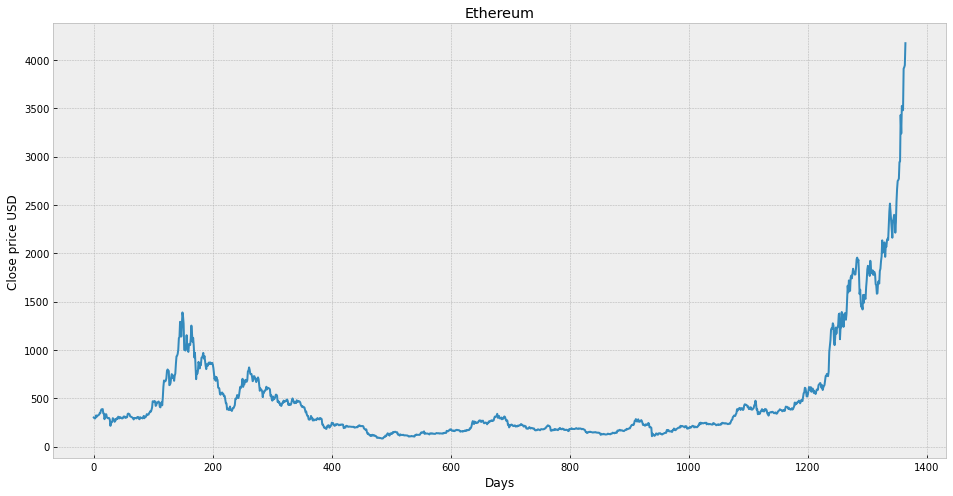

In [8]:
# show the closing as timeseries

plt.figure(figsize = (16,8))
plt.title('Ethereum')
plt.xlabel('Days')
plt.ylabel('Close price USD')
plt.plot(df['close'])
plt.show()

## 3. Preparing model for the first itereation

In [9]:
#get the close price only

df_close = df[['close']]
df_close

,close
0,302.00
1,293.96
2,290.91
3,299.10
4,323.29
...,...
1360,3479.53
1361,3910.26
1362,3923.95
1363,3945.88


In [10]:
# create a variable to predict x days in the future
future_days = 25
# create a new column (target) shifted 'x' days up
df_close['prediction']= df_close[['close']].shift(-future_days)
df_close.head()

<ipython-input-10-8e4acfb3f25f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_close['prediction']= df_close[['close']].shift(-future_days)


,close,prediction
0,302.00,297.30
1,293.96,293.96
2,290.91,276.91
3,299.10,215.21
4,323.29,253.00


In [11]:
df_close.tail()

,close,prediction
1360,3479.53,NaN
1361,3910.26,NaN
1362,3923.95,NaN
1363,3945.88,NaN
1364,4173.45,NaN


In [12]:
# Create the feature data set (X) and convert it in a numpy dataset and remove the last rows days (last 25 in this case)
X = np.array(df_close.drop(['prediction'], 1))[:-future_days]
print(X)

[[ 302.  ]
 [ 293.96]
 [ 290.91]
 ...
 [2432.6 ]
 [2514.04]
 [2422.67]]


In [13]:
len(X)

# the length must be tot len minus future days variable

1340

In [14]:
# Create the target data set (y) and convet it as well in array
y = np.array(df_close['prediction'])[:-future_days]
y

array([ 297.3 ,  293.96,  276.91, ..., 3923.95, 3945.88, 4173.45])

In [15]:
# Split the data into 75% train and 25% test
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

## 4.1 First Iteration
- For the first iteration we are going to use the features we already have to predict hte target. 

In [16]:
# Create the models
# Create the decision tree first

tree = DecisionTreeRegressor().fit(x_train, y_train)

#Create the linear regression model now

lr= LinearRegression().fit(x_train, y_train)

In [17]:
#Get the last x rows of the feature data set

x_future = df_close.drop(['prediction'], 1)[:-future_days]

# now getting the last 25 rows

x_future = x_future.tail(future_days)

# turn it into an array

x_future = np.array(x_future)

print(x_future)

[[1668.08]
 [1581.84]
 [1585.74]
 [1698.84]
 [1712.63]
 [1687.01]
 [1816.74]
 [1840.46]
 [1919.37]
 [1968.05]
 [2133.69]
 [2008.52]
 [2075.69]
 [2107.38]
 [2112.21]
 [1963.47]
 [2080.46]
 [2066.87]
 [2133.49]
 [2151.36]
 [2137.69]
 [2299.19]
 [2432.6 ]
 [2514.04]
 [2422.67]]


In [18]:
# Show the modeltree prediction
tree_prediction = tree.predict(x_future)
print(tree_prediction)
print()

# show the linear regression model results
lr_prediction = lr.predict(x_future)
print(lr_prediction)

[2317.6  2235.64 2161.12 2330.03 1486.78 2397.94 2367.39 2213.35 1963.47
 2532.6  2666.13 2748.24 3239.01 2772.42 2772.42 2949.56 3239.01 3239.01
 3524.26 2666.13 2666.13 3910.26 4173.45 3945.88 4173.45]

[1944.19296747 1841.89668844 1846.52279568 1980.67990558 1997.0373463
 1966.64738029 2120.53068593 2148.66690739 2242.26847718 2300.01178496
 2496.49086263 2348.01654391 2427.69234473 2465.28243149 2471.01168738
 2294.57907441 2433.35042974 2417.23022528 2496.25362636 2517.45068696
 2501.235588   2692.80387491 2851.05232789 2947.65493648 2839.27354716]


In [19]:
# Visualise the data
prediction = tree_prediction

valid = df_close[X.shape[0]:]
valid['prediction'] = prediction
valid

<ipython-input-19-d970e93c6f55>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['prediction'] = prediction


,close,prediction
1340,2317.60,2317.60
1341,2235.64,2235.64
1342,2161.12,2161.12
1343,2330.03,2330.03
1344,2357.06,1486.78
1345,2397.94,2397.94
1346,2367.39,2367.39
1347,2213.35,2213.35
1348,2320.49,1963.47
1349,2532.60,2532.60


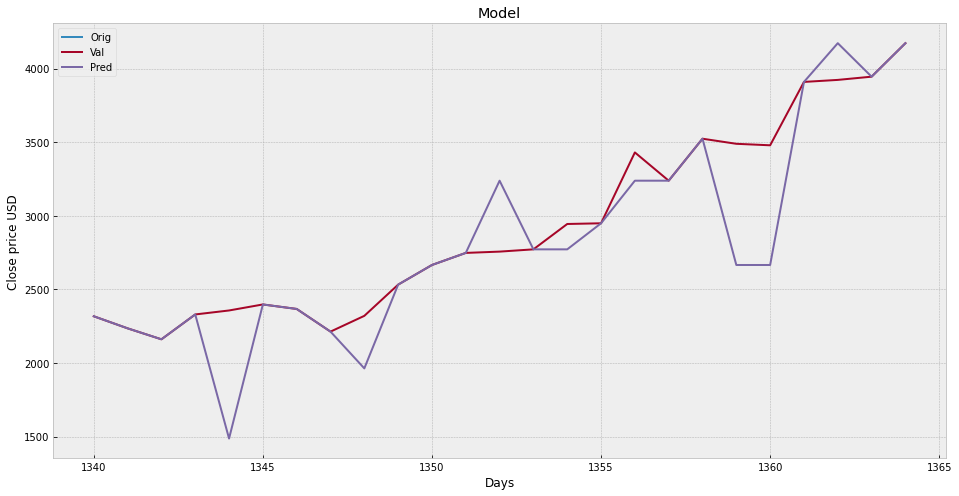

In [20]:
# Plot the re
plt.figure(figsize= (16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close price USD')
plt.plot(df_close['close'][1300:0]) # original data
plt.plot(valid[['close', 'prediction']])
plt.legend(['Orig', 'Val', 'Pred'])
plt.show()itit2

In [22]:
# check for the precision and accuracy of the model
from sklearn.metrics import accuracy_score

# print('Accuracy_score: ', accuracy_score(df['close'], valid))

### Results:
- From the charts the we can see that the tree model is performing better than the linear one

## 4.2 Second Iteration
- In this iteration we are going to include the polarity from twitter as a feature in X. If the model will better respond it would mean that price of eth is influenced by social polarity and tweets opinions

In [23]:
# import the new data with the sentiments
df_final = pd.read_csv('final_df.csv')
df_final

,Unnamed: 0,open,high,low,close,volume,sentiment
0,2017-08-19 02:00:00,293.31,299.90,278.00,290.91,2.146198e+03,0.112602
1,2017-08-20 02:00:00,289.41,300.53,282.85,299.10,2.510139e+03,0.112449
2,2017-08-21 02:00:00,299.10,346.52,294.60,323.29,5.219445e+03,0.110693
3,2017-08-22 02:00:00,321.04,330.41,144.21,309.80,7.956351e+03,0.076931
4,2017-08-23 02:00:00,312.25,324.99,309.41,315.74,8.665726e+03,-0.198597
...,...,...,...,...,...,...,...
1358,2021-05-07 02:00:00,3489.74,3587.00,3353.23,3479.53,7.605446e+05,0.199551
1359,2021-05-08 02:00:00,3479.79,3958.33,3449.27,3910.26,1.130468e+06,0.170005
1360,2021-05-09 02:00:00,3910.26,3983.65,3726.08,3923.95,1.000401e+06,0.110743
1361,2021-05-10 02:00:00,3923.95,4208.00,3650.00,3945.88,1.505898e+06,0.116676


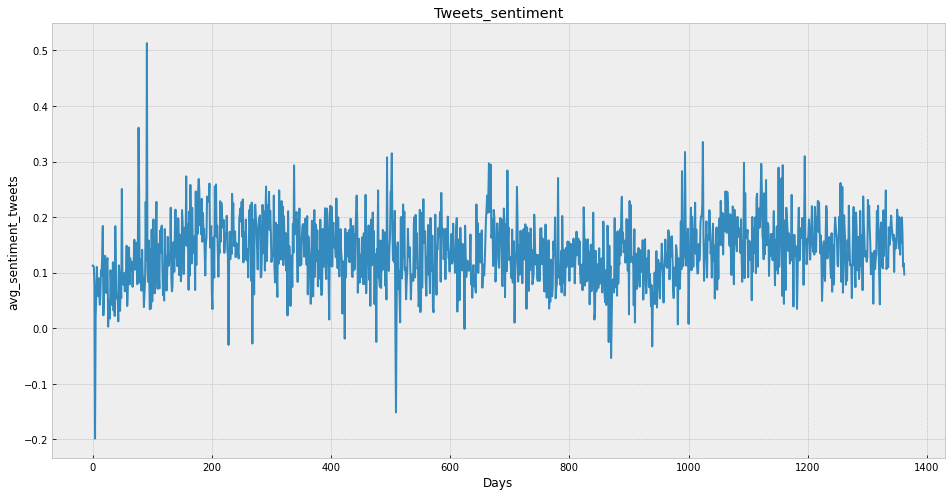

In [24]:
# show the closing as timeseries

plt.figure(figsize = (16,8))
plt.title('Tweets_sentiment')
plt.xlabel('Days')
plt.ylabel('avg_sentiment_tweets')
plt.plot(df_final['sentiment'])
#plt.plot(df['close'])
plt.show()

In [25]:
#get the close price only

df_close_2 = df_final[['close', 'sentiment']]

# create a variable to predict x days in the future
future_days = 25
# create a new column (target) shifted 'x' days up
df_close_2['prediction']= df_close[['close']].shift(-future_days)
df_close_2.tail()

<ipython-input-25-58d331ac3343>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_close_2['prediction']= df_close[['close']].shift(-future_days)


,close,sentiment,prediction
1358,3479.53,0.199551,NaN
1359,3910.26,0.170005,NaN
1360,3923.95,0.110743,NaN
1361,3945.88,0.116676,NaN
1362,4173.45,0.096680,NaN


In [35]:
# Create the feature data set (X) and convert it in a numpy dataset and remove the last rows days (last 25 in this case)
X = np.array(df_close_2.drop(['prediction'], 1))[:-future_days]
print(X)

# Create the target data set (y) and convet it as well in array
y = np.array(df_close_2['prediction'])[:-future_days]
y

[[2.90910000e+02 1.12602299e-01]
 [2.99100000e+02 1.12448810e-01]
 [3.23290000e+02 1.10692593e-01]
 ...
 [2.43260000e+03 1.09977941e-01]
 [2.51404000e+03 1.81536458e-01]
 [2.42267000e+03 1.49318947e-01]]


array([ 297.3 ,  293.96,  276.91, ..., 3479.53, 3910.26, 3923.95])

In [36]:
# Split the data into 75% train and 25% test
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [37]:
# Create the models
# Create the decision tree first
#train for the new feature

tree = DecisionTreeRegressor().fit(x_train, y_train)


In [38]:
#Get the last x rows of the feature data set

x_future_2 = df_close_2.drop(['prediction'], 1)[:-future_days]

# now getting the last 25 rows

x_future_2 = x_future_2.tail(future_days)

# turn it into an array

x_future_2 = np.array(x_future_2)

print(x_future_2)

[[1.66808000e+03 1.06469767e-01]
 [1.58184000e+03 1.24147368e-01]
 [1.58574000e+03 1.34195294e-01]
 [1.69884000e+03 2.11070492e-01]
 [1.71263000e+03 1.73184848e-01]
 [1.68701000e+03 2.20294937e-01]
 [1.81674000e+03 1.36830769e-01]
 [1.84046000e+03 9.27494624e-02]
 [1.91937000e+03 4.29409091e-02]
 [1.96805000e+03 1.75950000e-01]
 [2.13369000e+03 1.90281818e-01]
 [2.00852000e+03 1.11379762e-01]
 [2.07569000e+03 1.32077273e-01]
 [2.10738000e+03 1.07714103e-01]
 [2.11221000e+03 2.12071831e-01]
 [1.96347000e+03 1.29991398e-01]
 [2.08046000e+03 1.89592857e-01]
 [2.06687000e+03 1.88770707e-01]
 [2.13349000e+03 2.47921053e-01]
 [2.15136000e+03 1.06394253e-01]
 [2.13769000e+03 1.10201099e-01]
 [2.29919000e+03 1.22059770e-01]
 [2.43260000e+03 1.09977941e-01]
 [2.51404000e+03 1.81536458e-01]
 [2.42267000e+03 1.49318947e-01]]


In [41]:
# Show the modeltree prediction with sentiment
tree_prediction_2 = tree.predict(x_future_2)
print(tree_prediction_2)
print()



[2514.04 2422.67 1816.74 2161.12 2161.12 2330.03 2066.87 2112.21 2367.39
 2213.35 3524.26 2532.6  2772.42 2532.6  3524.26 2772.42 2944.77 2944.77
 3524.26 3524.26 3524.26 3489.73 3479.53 3910.26 3489.73]



In [45]:
# Visualise the data
prediction_2 = tree_prediction_2

valid_2 = df_close_2[X.shape[0]:]
valid_2['prediction_2'] = prediction_2
del valid_2['prediction']
valid_2

<ipython-input-45-72115a41bda8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_2['prediction_2'] = prediction_2


,close,sentiment,prediction_2
1338,2317.60,0.158185,2514.04
1339,2235.64,0.185272,2422.67
1340,2161.12,0.202618,1816.74
1341,2330.03,0.183788,2161.12
1342,2357.06,0.168977,2161.12
1343,2397.94,0.158827,2330.03
1344,2367.39,0.168395,2066.87
1345,2213.35,0.101177,2112.21
1346,2320.49,0.162125,2367.39
1347,2532.60,0.143518,2213.35


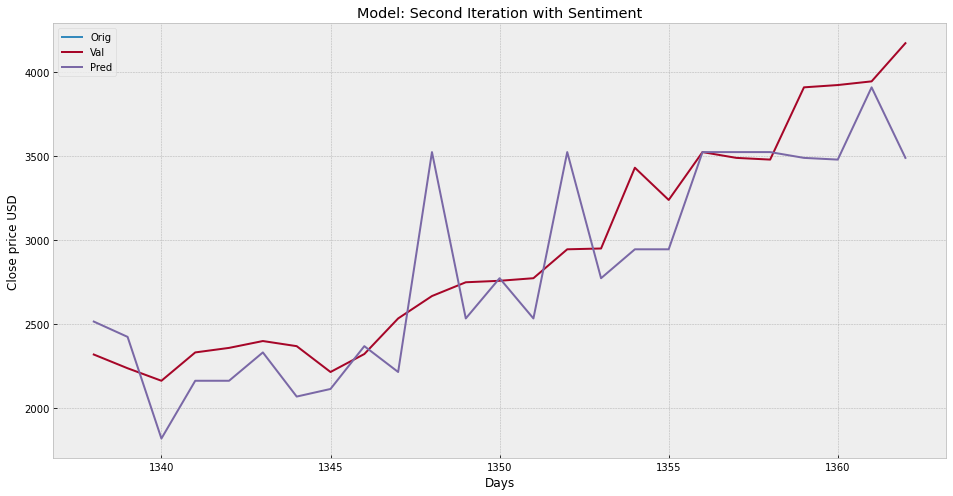

In [47]:
# plot the new prediction
# Plot the re
plt.figure(figsize= (16,8))
plt.title('Model: Second Iteration with Sentiment')
plt.xlabel('Days')
plt.ylabel('Close price USD')
plt.plot(df_close['close'][1300:0]) # original data
plt.plot(valid_2[['close', 'prediction_2']])
plt.legend(['Orig', 'Val', 'Pred'])
plt.show()

## 4.3 Third Iteration
- Now the Google trends data will be introduced